## KNN classifier in Iris and robot dataset

# Use of KNN classifier
     1.Getting all neighbours for that test point
         neighbours=get_neighbors(train_dataset, test_sample,k)
	 2.Extracting class with highest number of votes among those neighbours
         major_class= get_votes(neighbors)
     3.appending classfication for that result
         prediction_list.append(major_class)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import csv
import random
import operator
import math
from sklearn.metrics.pairwise import cosine_similarity as cos
from sklearn.metrics import precision_recall_fscore_support as score

In [9]:
train_df=[]
validation_df=[]
split = 0.2
df=pd.read_csv('Iris.csv',header=None)
dataset=list(df)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


### splitting data as train and validation

In [10]:
def divide(df,validation_data_size):
    indices = df.index.tolist()
    validation_data_size=round(validation_data_size*len(df))
    validation_indices = random.sample(population=indices, k=validation_data_size)
    train_data = df.drop(validation_indices)
    validation_data = df.loc[validation_indices]
    return train_data,validation_data

In [11]:
random.seed(0)
train_df,validation_df = divide(df,validation_data_size=0.2)

### Converting dataframe into list

In [12]:
train_data=train_df.values
validation_data=validation_df.values
print(type(validation_data))
print(validation_data[:,-1])

<class 'numpy.ndarray'>
['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


### getting Euclidean  distance,manhattan distance and cosine similarity between test entry and train entry(both input as list)

In [13]:
def get_euclidean_distance(test_entry,train_entry):
    distance = 0
    # we should neglect last entry which is target label
    for i in range(len(train_entry)-1):
        distance += pow((test_entry[i]-train_entry[i]),2)
    return math.sqrt(distance)

def get_cosine_similarity(test_entry,train_entry):
    train=np.array(train_entry[:-1])
    test=np.array(test_entry[:-1])
    dot_product = np.dot(test,train)
    norm_train = np.linalg.norm(train)
    norm_test = np.linalg.norm(test)
    return 1-(dot_product / (norm_train * norm_test))

def get_manhattan_distance(test_entry,train_entry):
    distance=0
    for i in range(len(train_entry)-1):
        distance += abs(test_entry[i]-train_entry[i])
    return math.sqrt(distance)

### Getting neighbours for the test instance (one row from test)

In [14]:
def get_neighbours(train_data,test_entry,k):
    neighbour_distances = []
    for train_entry in train_data:
        #dist = get_euclidean_distance(test_entry,train_entry)
        #dist=get_manhattan_distance(test_entry,train_entry)
        dist=get_cosine_similarity(test_entry,train_entry)
        neighbour_distances.append((train_entry,dist))
    neighbour_distances.sort(key=operator.itemgetter(1))
    k_closest_neighbors = []
    for i in range(k):
        #saving the neighbors entries so we can extract the last column while deciding major class in 
        #get_votes function
        k_closest_neighbors.append(neighbour_distances[i][0])
    return k_closest_neighbors
    

###  get major feature from k_closest_neighbours

In [15]:
def get_votes(neighbors):
    votes_dict = {}
    for i in neighbors:
        v=i[-1]
        if v in votes_dict:
            votes_dict[v] += 1
        else:
            votes_dict[v]=1
    sorted_votes = sorted(votes_dict.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_votes[0][0]

### get_accuracy function takes input as classified list and actual list

In [16]:
def get_accuracy(pred,actual):
    a,b,c,d=score(actual,pred)  
    
    #calculation of precision ,recall and F1 score
    print("precision:",a)
    print("recall:",b)
    print("fscore:",c)
    return a

    

### Test the  above functions

In [17]:
#User value of k=3
k=3

prediction_list=[]
count=0
entries=0
for test in validation_data:
    neighbours=get_neighbours(train_data,test,8)
    major_class = get_votes(neighbours)
    prediction_list.append(major_class)
    print('classified:',major_class)
    print("actual label:",test[-1])
    if(major_class==test[-1]):
        print("Correct classification")
        count+=1
    else:
        print("Incorrect classification")
    entries+=1
print("Tests:",entries)
print("Correct:",count)
print("Accuracy:",(count/entries))
#print(type(np.asarray(prediction_list)))
#print(type(validation_data[:,-1]))
accuracy = get_accuracy(np.array(prediction_list),validation_data[:,-1])
print("Accuracy:",accuracy);

classified: Iris-versicolor
actual label: Iris-versicolor
Correct classification
classified: Iris-virginica
actual label: Iris-virginica
Correct classification
classified: Iris-setosa
actual label: Iris-setosa
Correct classification
classified: Iris-versicolor
actual label: Iris-versicolor
Correct classification
classified: Iris-virginica
actual label: Iris-virginica
Correct classification
classified: Iris-setosa
actual label: Iris-setosa
Correct classification
classified: Iris-versicolor
actual label: Iris-versicolor
Correct classification
classified: Iris-versicolor
actual label: Iris-versicolor
Correct classification
classified: Iris-setosa
actual label: Iris-setosa
Correct classification
classified: Iris-setosa
actual label: Iris-setosa
Correct classification
classified: Iris-setosa
actual label: Iris-setosa
Correct classification
classified: Iris-versicolor
actual label: Iris-versicolor
Correct classification
classified: Iris-setosa
actual label: Iris-setosa
Correct classification

## KNN Model on admission dataset

In [18]:
admission_train_df=[]
admission_validation_df=[]
split= 0.2
admission_df=pd.read_csv('admission_data.csv')
admission_dataset=list(df)
admission_df.drop(['Serial No.'], axis = 1, inplace = True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74


In [19]:
random.seed(0)
admission_train_df,admission_validation_df = divide(admission_df,validation_data_size=0.2)

admission_train_data=admission_train_df.values
admission_validation_data=admission_validation_df.values
print(type(admission_validation_data))
print(admission_validation_data[:,-1])

<class 'numpy.ndarray'>
[0.72 0.63 0.78 0.46 0.54 0.57 0.94 0.84 0.62 0.76 0.78 0.54 0.73 0.68
 0.68 0.89 0.58 0.93 0.68 0.67 0.87 0.71 0.86 0.93 0.67 0.64 0.47 0.59
 0.67 0.91 0.93 0.64 0.9  0.64 0.84 0.85 0.66 0.65 0.63 0.81 0.76 0.91
 0.73 0.62 0.38 0.94 0.72 0.93 0.45 0.49 0.61 0.57 0.78 0.79 0.93 0.71
 0.7  0.86 0.8  0.65 0.97 0.79 0.79 0.7  0.49 0.89 0.48 0.67 0.86 0.73
 0.66 0.63 0.77 0.44 0.72 0.97 0.93 0.87 0.67 0.61 0.56 0.79 0.83 0.62
 0.76 0.87 0.68 0.73 0.74 0.93]


In [20]:
#User value of k=3
k=3

admission_prediction_list=[]
count=0
entries=0
for test in admission_validation_data:
    neighbours=get_neighbours(admission_train_data,test,k)
    major_class = get_votes(neighbours)
    admission_prediction_list.append(major_class)
    print('classified:',major_class)
    print("actual label:",test[-1])
    if(major_class==test[-1]):
        print("Correct classification")
        count+=1
    else:
        print("Incorrect classification")
    entries+=1
print("Tests:",entries)
print("Correct:",count)
print("Accuracy:",(count/entries))
#print(type(np.asarray(prediction_list)))
#print(type(validation_data[:,-1]))
#accuracy = get_accuracy(np.array(admission_prediction_list),admission_validation_data[:,-1])


classified: 0.63
actual label: 0.72
Incorrect classification
classified: 0.69
actual label: 0.63
Incorrect classification
classified: 0.8
actual label: 0.78
Incorrect classification
classified: 0.62
actual label: 0.46
Incorrect classification
classified: 0.56
actual label: 0.54
Incorrect classification
classified: 0.64
actual label: 0.57
Incorrect classification
classified: 0.96
actual label: 0.94
Incorrect classification
classified: 0.8
actual label: 0.84
Incorrect classification
classified: 0.72
actual label: 0.62
Incorrect classification
classified: 0.82
actual label: 0.76
Incorrect classification
classified: 0.93
actual label: 0.78
Incorrect classification
classified: 0.71
actual label: 0.54
Incorrect classification
classified: 0.76
actual label: 0.73
Incorrect classification
classified: 0.66
actual label: 0.68
Incorrect classification
classified: 0.76
actual label: 0.68
Incorrect classification
classified: 0.92
actual label: 0.89
Incorrect classification
classified: 0.81
actual la

## KNN Model on robot1 dataset

In [21]:
robot1_train_df=[]
robot1_validation_df=[]
split= 0.2
robot1_df=pd.read_csv('Robot1',header=None,delimiter=" ")

#robo1_data=robot1_df.values
robo1_df=robot1_df[robot1_df.columns[[2,3,4,5,6,7,1]]]
robot1_data=robo1_df.values
print(robot1_data)

[[1 1 1 1 3 1 1]
 [1 1 1 1 3 2 1]
 [1 1 1 3 2 1 1]
 [1 1 1 3 3 2 1]
 [1 1 2 1 2 1 1]
 [1 1 2 1 2 2 1]
 [1 1 2 2 3 1 1]
 [1 1 2 2 4 1 1]
 [1 1 2 3 1 2 1]
 [1 2 1 1 1 2 1]
 [1 2 1 1 2 1 0]
 [1 2 1 1 3 1 0]
 [1 2 1 1 4 2 0]
 [1 2 1 2 1 1 1]
 [1 2 1 2 3 1 0]
 [1 2 1 2 3 2 0]
 [1 2 1 2 4 2 0]
 [1 2 1 3 2 1 0]
 [1 2 1 3 4 2 0]
 [1 2 2 1 2 2 0]
 [1 2 2 2 3 2 0]
 [1 2 2 2 4 1 0]
 [1 2 2 2 4 2 0]
 [1 2 2 3 2 2 0]
 [1 2 2 3 3 1 0]
 [1 2 2 3 3 2 0]
 [1 3 1 1 2 1 0]
 [1 3 1 1 4 1 0]
 [1 3 1 2 2 1 0]
 [1 3 1 2 4 1 0]
 [1 3 1 3 1 2 1]
 [1 3 1 3 2 2 0]
 [1 3 1 3 3 1 0]
 [1 3 1 3 4 1 0]
 [1 3 1 3 4 2 0]
 [1 3 2 1 2 2 0]
 [1 3 2 2 1 2 1]
 [1 3 2 2 2 2 0]
 [1 3 2 2 3 2 0]
 [1 3 2 2 4 1 0]
 [1 3 2 2 4 2 0]
 [1 3 2 3 1 1 1]
 [1 3 2 3 2 1 0]
 [1 3 2 3 4 1 0]
 [1 3 2 3 4 2 0]
 [2 1 1 1 3 1 0]
 [2 1 1 1 3 2 0]
 [2 1 1 2 1 1 1]
 [2 1 1 2 1 2 1]
 [2 1 1 2 2 2 0]
 [2 1 1 2 3 1 0]
 [2 1 1 2 4 1 0]
 [2 1 1 2 4 2 0]
 [2 1 1 3 4 1 0]
 [2 1 2 1 2 2 0]
 [2 1 2 1 3 1 0]
 [2 1 2 1 4 2 0]
 [2 1 2 2 3 1 0]
 [2 1 2 2 4 2 

In [22]:
random.seed(0)
robot1_train_df,robot1_validation_df = divide(robo1_df,validation_data_size=0.2)

robot1_train_data=robot1_train_df.values
robot1_validation_data=robot1_validation_df.values
#print(type(robot1_validation_data))
#print(robot1_validation_data[:,-1])
#print(robot1_train_df)

### Testing validation daata against train data

classified: 1
actual label: 1
Correct classification
classified: 0
actual label: 0
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 0
actual label: 0
Correct classification
classified: 0
actual label: 1
Incorrect classification
classified: 0
actual label: 0
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 0
actual label: 0
Correct classification
classified: 1
actual label: 0
Incorrect classification
classified: 0
actual label: 0
Correct classification
classified: 0
actual label: 0
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 0
actual label: 0
Correct classification
classified: 0
actual label: 1
Incorrect classification
classified: 0
actual label: 0
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 0
actual label: 0
Correct cl

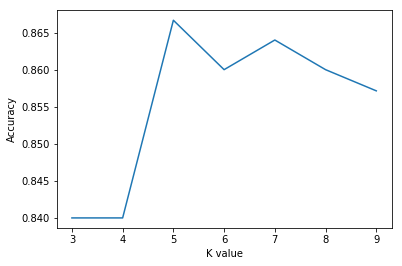

In [23]:
#User value of k


robot1_prediction_list=[]
accuracy_list=[]
k_list=[]
count=0
entries=0
for k in range(3,10):
    for test in robot1_validation_data:
        neighbours=get_neighbours(robot1_train_data,test,k)
        major_class = get_votes(neighbours)
        robot1_prediction_list.append(major_class)
        print('classified:',major_class)
        print("actual label:",test[-1])
        if(major_class==test[-1]):
            print("Correct classification")
            count+=1
        else:
            print("Incorrect classification")
        entries+=1
    k_list.append(k)
    print("Tests:",entries)
    print("Correct:",count)
    print("Accuracy:",(count/entries))
    accuracy_list.append(count/entries)



### K-value vs accuracy graph

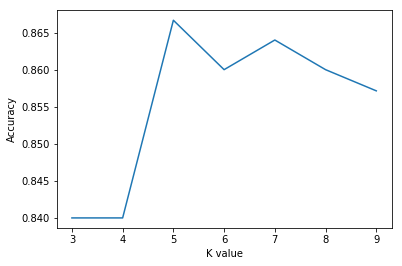

In [27]:
mlt.plot(k_list,accuracy_list)
mlt.xlabel("K value")
mlt.ylabel("Accuracy")
mlt.show()

## KNN model on Robot2 dataset

In [5]:
robot2_train_df=[]
robot2_validation_df=[]
split= 0.2
robot2_df=pd.read_csv('Robot2',header=None,delimiter=" ")

#robo1_data=robot1_df.values
robo2_df=robot2_df[robot2_df.columns[[2,3,4,5,6,7,1]]]
robot2_data=robo2_df.values
print(robot2_data)

[[1 1 1 1 1 2 1]
 [1 1 1 1 2 1 1]
 [1 1 1 1 2 2 1]
 [1 1 1 1 3 1 0]
 [1 1 1 1 4 1 0]
 [1 1 1 2 1 1 1]
 [1 1 1 2 2 2 1]
 [1 1 1 2 4 2 0]
 [1 1 2 1 2 2 1]
 [1 1 2 1 4 2 0]
 [1 1 2 2 2 2 1]
 [1 1 2 2 4 1 0]
 [1 1 2 2 4 2 0]
 [1 1 2 3 1 1 1]
 [1 1 2 3 1 2 1]
 [1 1 2 3 3 1 1]
 [1 1 2 3 3 2 1]
 [1 2 1 1 3 1 1]
 [1 2 1 2 2 1 1]
 [1 2 1 2 2 2 1]
 [1 2 1 2 3 1 0]
 [1 2 1 3 1 1 1]
 [1 2 1 3 1 2 1]
 [1 2 1 3 2 1 1]
 [1 2 1 3 2 2 1]
 [1 2 1 3 3 2 1]
 [1 2 1 3 4 1 0]
 [1 2 2 1 3 1 1]
 [1 2 2 1 4 2 0]
 [1 2 2 2 1 1 1]
 [1 2 2 2 2 1 1]
 [1 2 2 2 2 2 1]
 [1 2 2 3 1 1 1]
 [1 2 2 3 2 1 1]
 [1 2 2 3 2 2 1]
 [1 3 1 1 2 1 0]
 [1 3 1 1 4 1 0]
 [1 3 1 2 3 2 0]
 [1 3 1 2 4 1 0]
 [1 3 1 3 1 1 0]
 [1 3 1 3 3 1 0]
 [1 3 2 1 1 1 0]
 [1 3 2 1 1 2 0]
 [1 3 2 1 2 1 0]
 [1 3 2 1 4 2 0]
 [1 3 2 2 3 2 0]
 [1 3 2 2 4 2 0]
 [1 3 2 3 4 1 0]
 [2 1 1 1 1 1 1]
 [2 1 1 1 1 2 1]
 [2 1 1 1 4 1 0]
 [2 1 1 1 4 2 0]
 [2 1 1 2 1 1 1]
 [2 1 1 2 1 2 1]
 [2 1 1 3 2 2 1]
 [2 1 1 3 3 2 1]
 [2 1 1 3 4 1 0]
 [2 1 2 1 2 2 1]
 [2 1 2 2 4 1 

In [24]:
random.seed(0)
robot2_train_df,robot2_validation_df = divide(robo2_df,validation_data_size=0.2)

robot2_train_data=robot2_train_df.values
robot2_validation_data=robot2_validation_df.values
#print(type(robot1_validation_data))
#print(robot1_validation_data[:,-1])
#print(robot1_train_df)

classified: 1
actual label: 1
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 0
actual label: 0
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 1
actual label: 1
Correct classification
classified: 0
actual label: 0
Correct classification
classified: 0
actual label: 1
Incorrect classification
classified: 0
actual label: 1
Incorrect classification
classified: 0
actual label: 0
Correct classification
classified: 0
actual label: 0
Correct classification
classified: 0
actual label: 0
Correct classification
classified: 0
actual label: 1
Incorrect classification
classified: 0
actual label: 1
Incorrect classification
classified: 0
actual label: 1
Incorrect classification
classified: 0
actual label: 1
Incorr

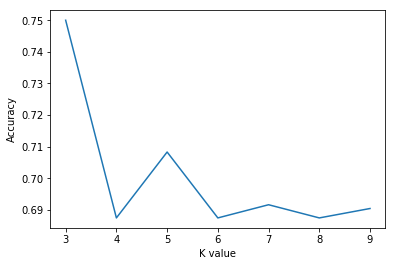

In [25]:
#User value of k


robot2_prediction_list=[]
accuracy_list1=[]
k_list1=[]
count=0
entries=0
for k in range(3,10):
    for test in robot2_validation_data:
        neighbours=get_neighbours(robot2_train_data,test,k)
        major_class = get_votes(neighbours)
        robot1_prediction_list.append(major_class)
        print('classified:',major_class)
        print("actual label:",test[-1])
        if(major_class==test[-1]):
            print("Correct classification")
            count+=1
        else:
            print("Incorrect classification")
        entries+=1
    k_list1.append(k)
    print("Tests:",entries)
    print("Correct:",count)
    print("Accuracy:",(count/entries))
    accuracy_list1.append(count/entries)



### K-value vs Accuracy graph

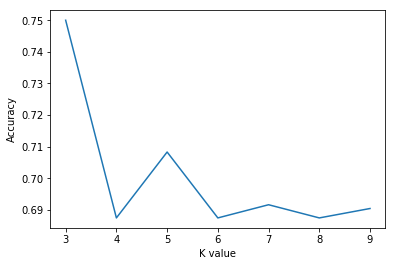

In [26]:
mlt.plot(k_list1,accuracy_list1)
mlt.xlabel("K value")
mlt.ylabel("Accuracy")
mlt.show()